In [19]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder


In [20]:

# Settings for better visualization
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:

# Load Dataset
print("Loading dataset...")
file_path = "../data/raw/iris.csv"  
df = pd.read_csv(file_path)


Loading dataset...


In [22]:

# Overview of the Dataset
print("\n### Dataset Overview ###")
print("Shape of the dataset:", df.shape)
print("\nFirst Few Rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))



### Dataset Overview ###
Shape of the dataset: (150, 5)

First Few Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0               5.10              3.50               1.40              0.20   
1               4.90              3.00               1.40              0.20   
2               4.70              3.20               1.30              0.20   
3               4.60              3.10               1.50              0.20   
4               5.00              3.60               1.40              0.20   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal wid

In [23]:

# Checking Missing Values
print("\n### Missing Values ###")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])



### Missing Values ###
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [25]:

# Drop columns with excessive missing values (optional)
# threshold = 50  # Drop columns with more than 50% missing
# df = df.loc[:, missing_percentage < threshold]


In [26]:

# Check for Duplicates
print("\n### Duplicates ###")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



### Duplicates ###
Number of duplicate rows: 1



### Univariate Analysis - Numerical Features ###


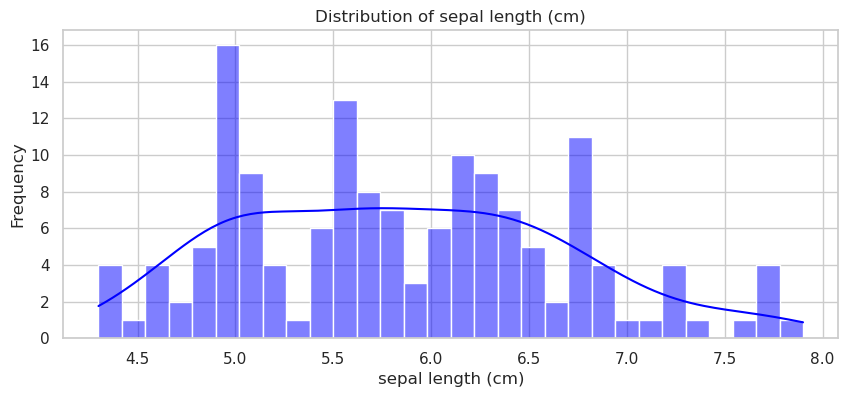

sepal length (cm) - Skewness: 0.31, Kurtosis: -0.57


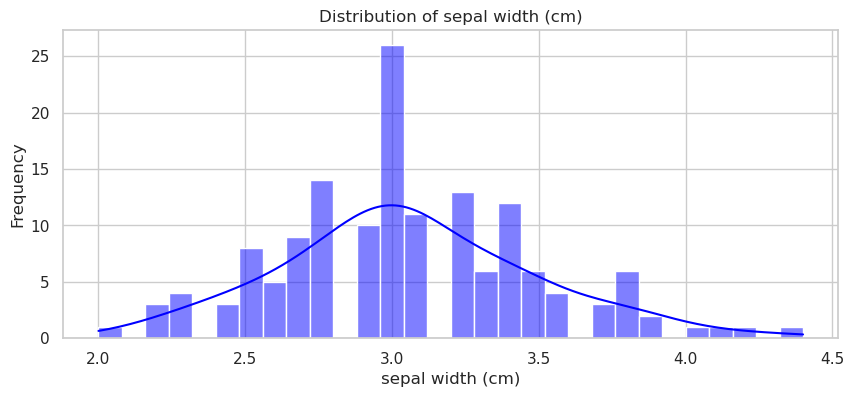

sepal width (cm) - Skewness: 0.32, Kurtosis: 0.18


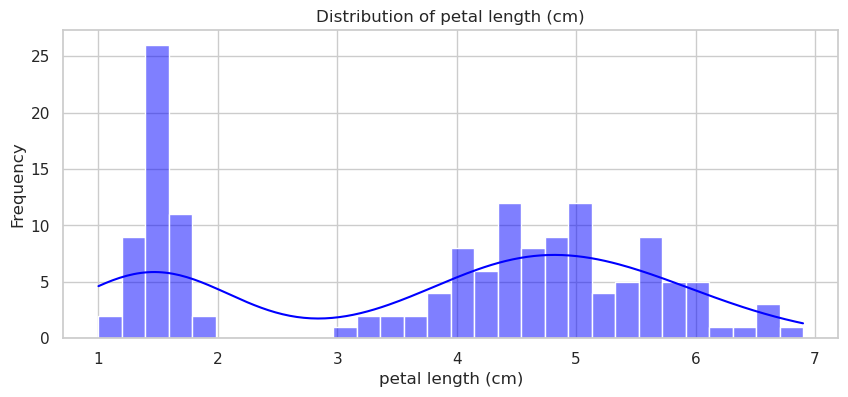

petal length (cm) - Skewness: -0.27, Kurtosis: -1.40


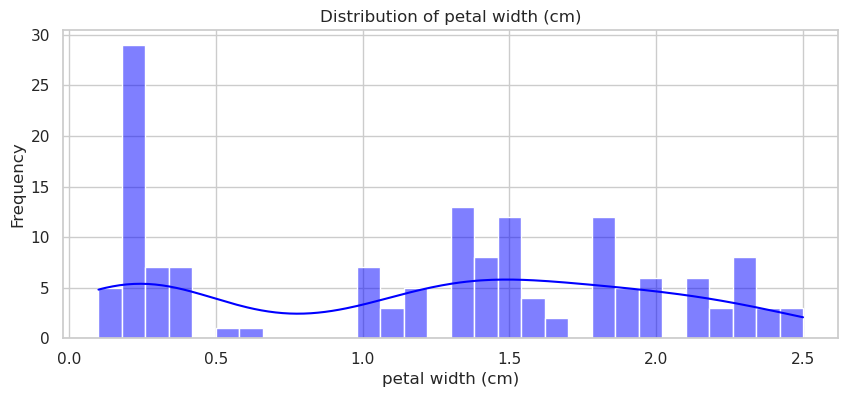

petal width (cm) - Skewness: -0.10, Kurtosis: -1.34


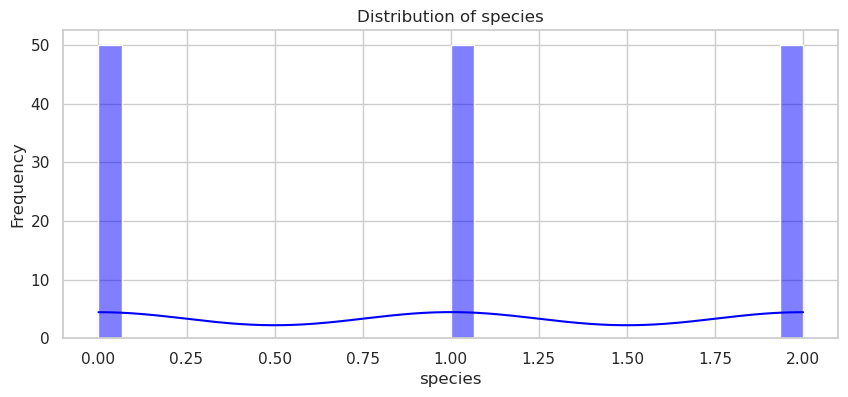

species - Skewness: 0.00, Kurtosis: -1.50


In [27]:

# Univariate Analysis - Numerical Features
print("\n### Univariate Analysis - Numerical Features ###")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Skewness and Kurtosis
    col_skewness = skew(df[col].dropna())
    col_kurtosis = kurtosis(df[col].dropna())
    print(f"{col} - Skewness: {col_skewness:.2f}, Kurtosis: {col_kurtosis:.2f}")


In [28]:

# Univariate Analysis - Categorical Features
print("\n### Univariate Analysis - Categorical Features ###")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()



### Univariate Analysis - Categorical Features ###



### Target Variable Distribution ###


/tmp/ipykernel_219751/844512169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette="viridis")


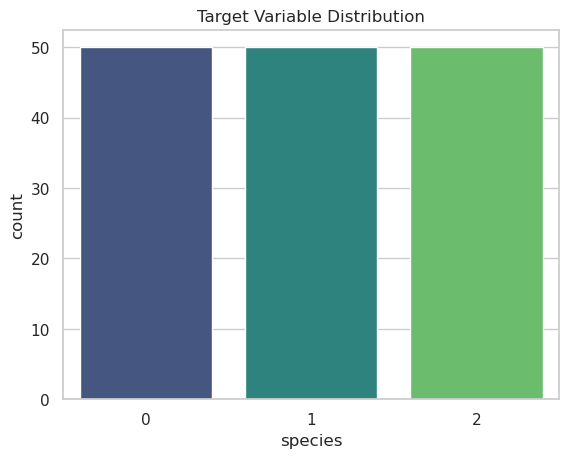

In [ ]:

# Target Distribution (if applicable)
if 'species' in df.columns:  
    print("\n### Target Variable Distribution ###")
    if df['species'].nunique() <= 10:  
        sns.countplot(data=df, x='species', palette="viridis")
        plt.title("Target Variable Distribution")
        plt.show()
    else:  
        sns.histplot(df['species'], kde=True, bins=30, color='green')
        plt.title("Target Variable Distribution")
        plt.show()



### Correlation Analysis ###


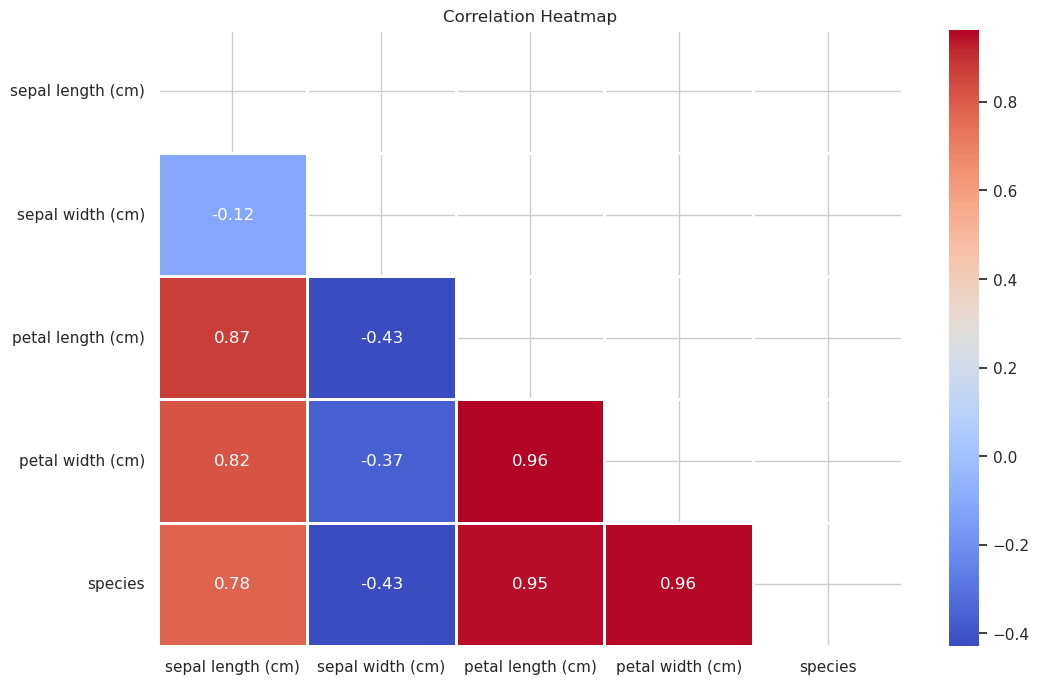

In [40]:

# Correlation Analysis
print("\n### Correlation Analysis ###")
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, mask=mask, linewidths=1)
plt.title("Correlation Heatmap")
plt.show()



### Pair Plot (Selected Features) ###


/home/stef/anaconda3/envs/iris-analysis-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/stef/anaconda3/envs/iris-analysis-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/stef/anaconda3/envs/iris-analysis-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/stef/anaconda3/envs/iris-analysis-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/stef/anaconda3/envs/iris-analysis-env/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

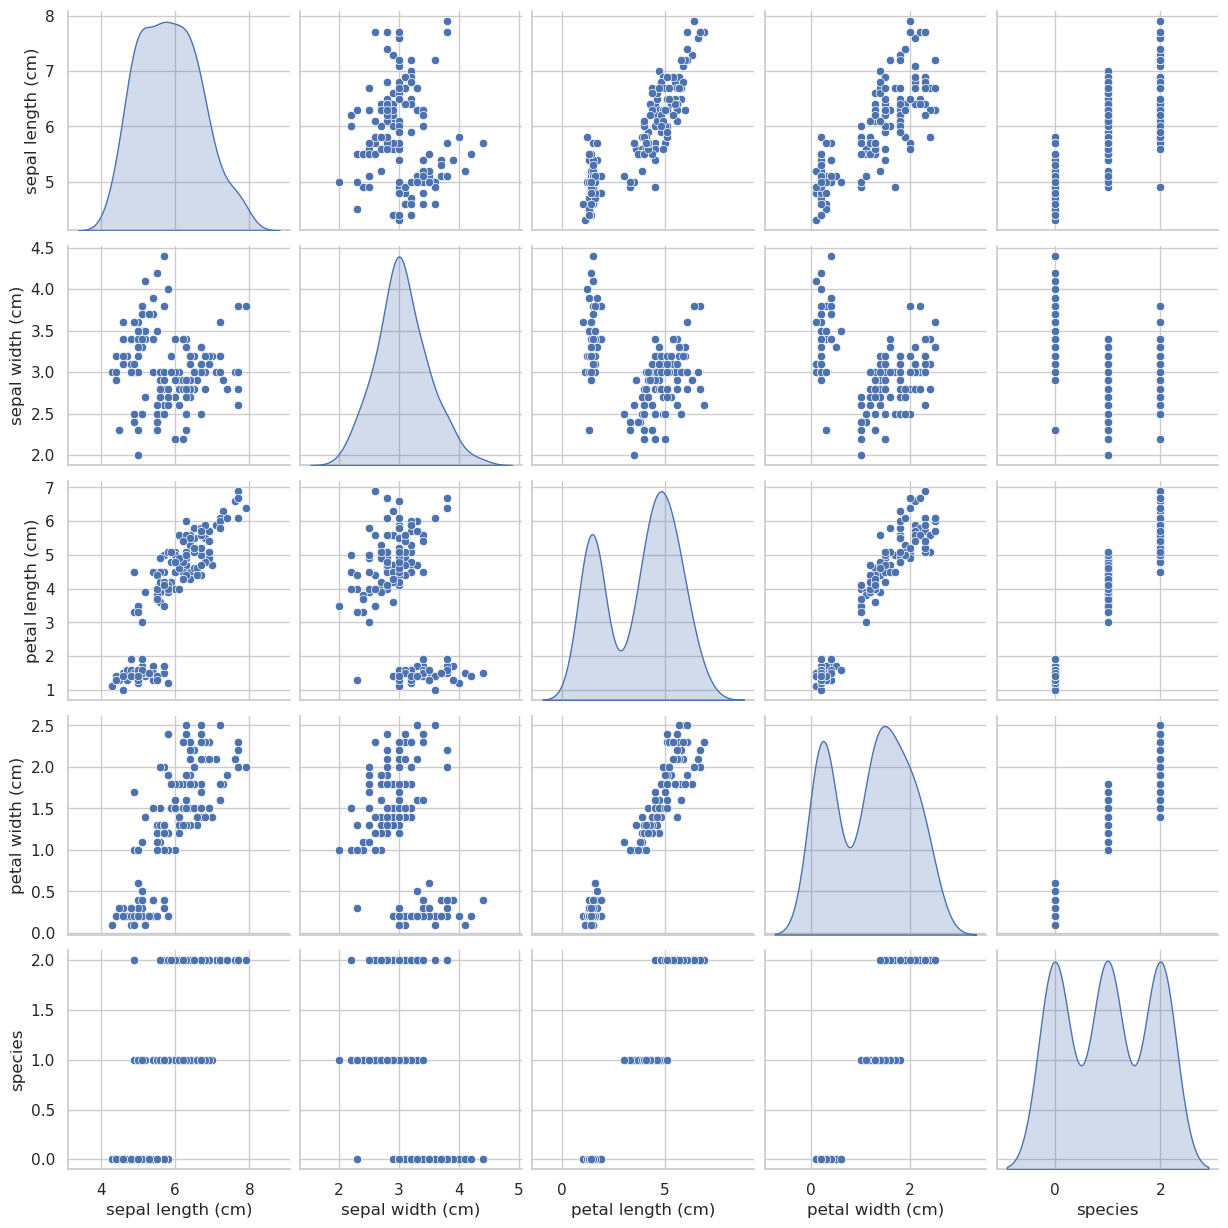

In [ ]:

# Pair Plot for Selected Features
print("\n### Pair Plot (Selected Features) ###")
selected_features = numerical_columns[:5]
sns.pairplot(df[selected_features], diag_kind="kde", palette="coolwarm")
plt.show()


In [ ]:

# Handling Categorical Variables
print("\n### Encoding Categorical Variables ###")
for col in categorical_columns:
    if df[col].nunique() <= 10:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Encoded {col} with LabelEncoder.")
    else:
        print(f"{col} has high cardinality ({df[col].nunique()} unique values), consider one-hot encoding.")



### Encoding Categorical Variables ###



### Outlier Detection ###


/tmp/ipykernel_219751/81748848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set2")


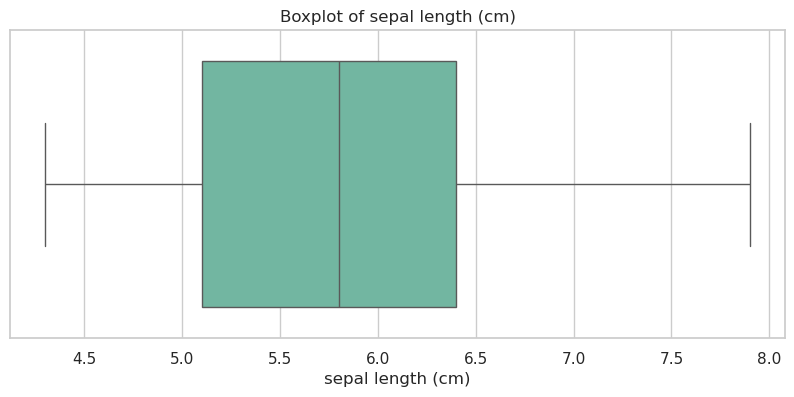

/tmp/ipykernel_219751/81748848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set2")


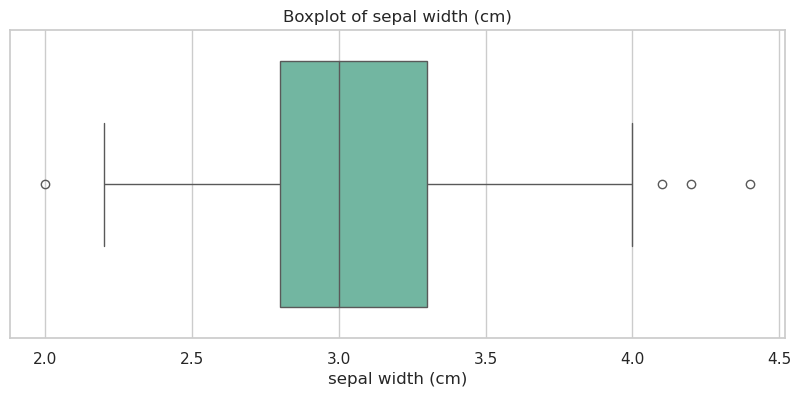

/tmp/ipykernel_219751/81748848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set2")


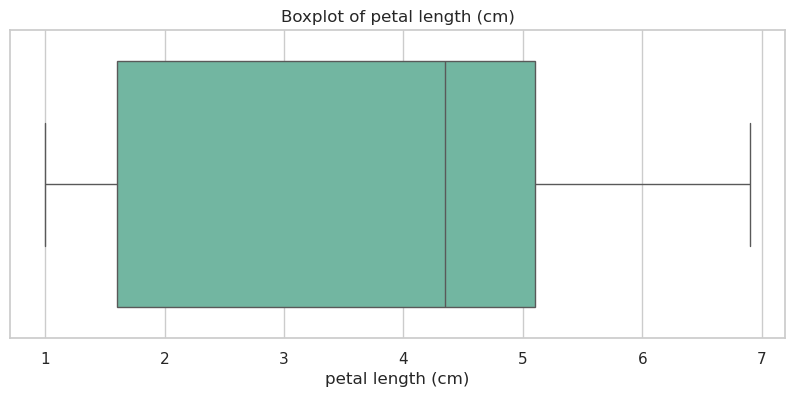

/tmp/ipykernel_219751/81748848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set2")


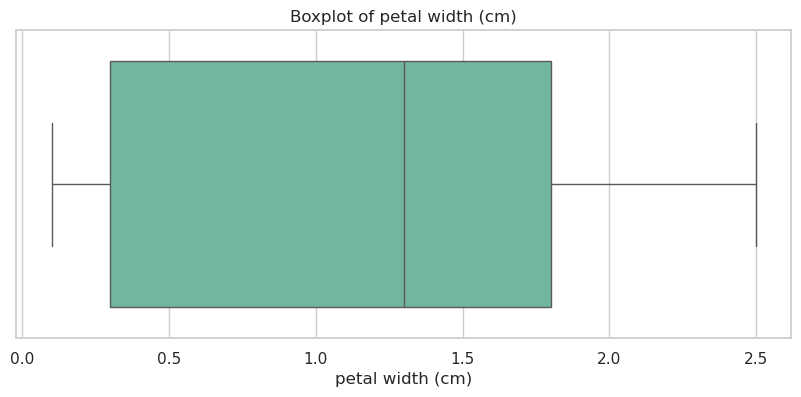

/tmp/ipykernel_219751/81748848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set2")


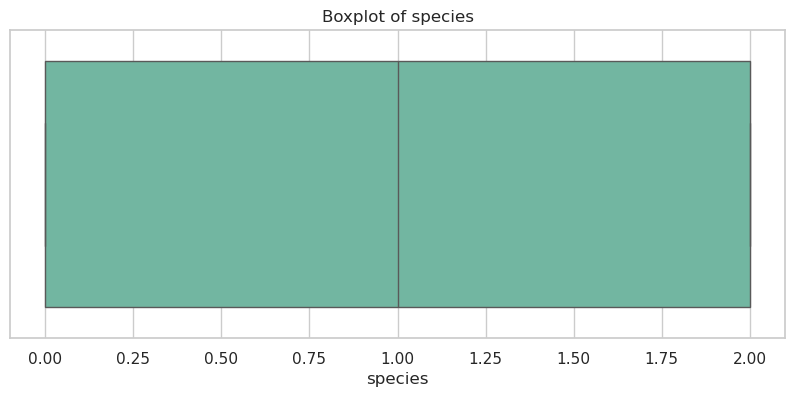

In [33]:

# Outlier Detection
print("\n### Outlier Detection ###")
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [34]:

# Feature Relationships
print("\n### Analyzing Feature Relationships ###")
for col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=col, y=num_col, palette="viridis")
        plt.title(f"{num_col} vs {col}")
        plt.xticks(rotation=45)
        plt.show()



### Analyzing Feature Relationships ###



### Class Imbalance Check ###
species
0   33.33
1   33.33
2   33.33
Name: proportion, dtype: float64


/tmp/ipykernel_219751/3961258860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


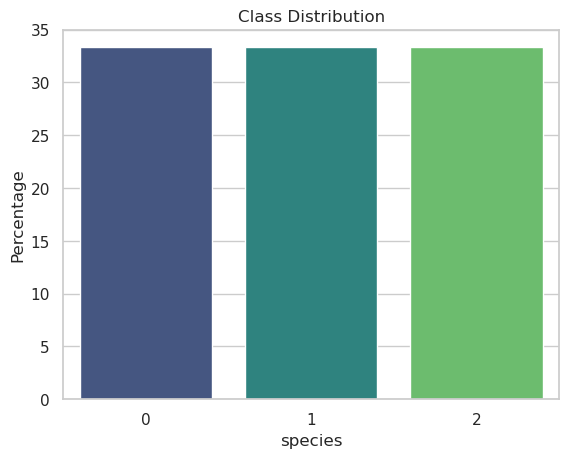

In [41]:

# Checking Class Imbalance
if 'species' in df.columns:
    print("\n### Class Imbalance Check ###")
    target_counts = df['species'].value_counts(normalize=True) * 100
    print(target_counts)
    sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
    plt.title("Class Distribution")
    plt.ylabel("Percentage")
    plt.show()
